<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 6**

In [2]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from math import e as e

## **General**

###**Ángulos**

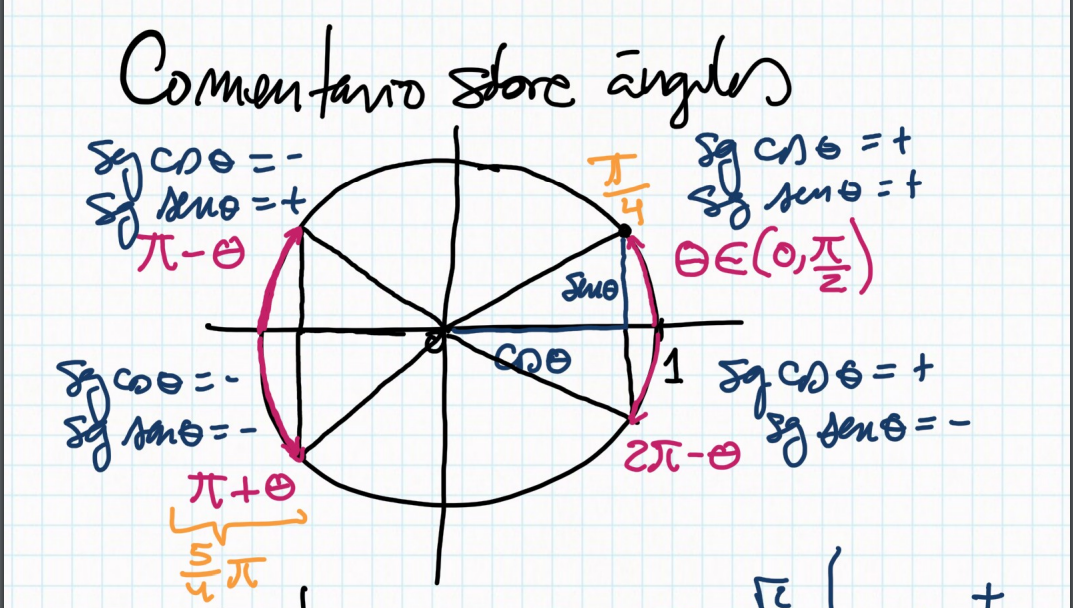

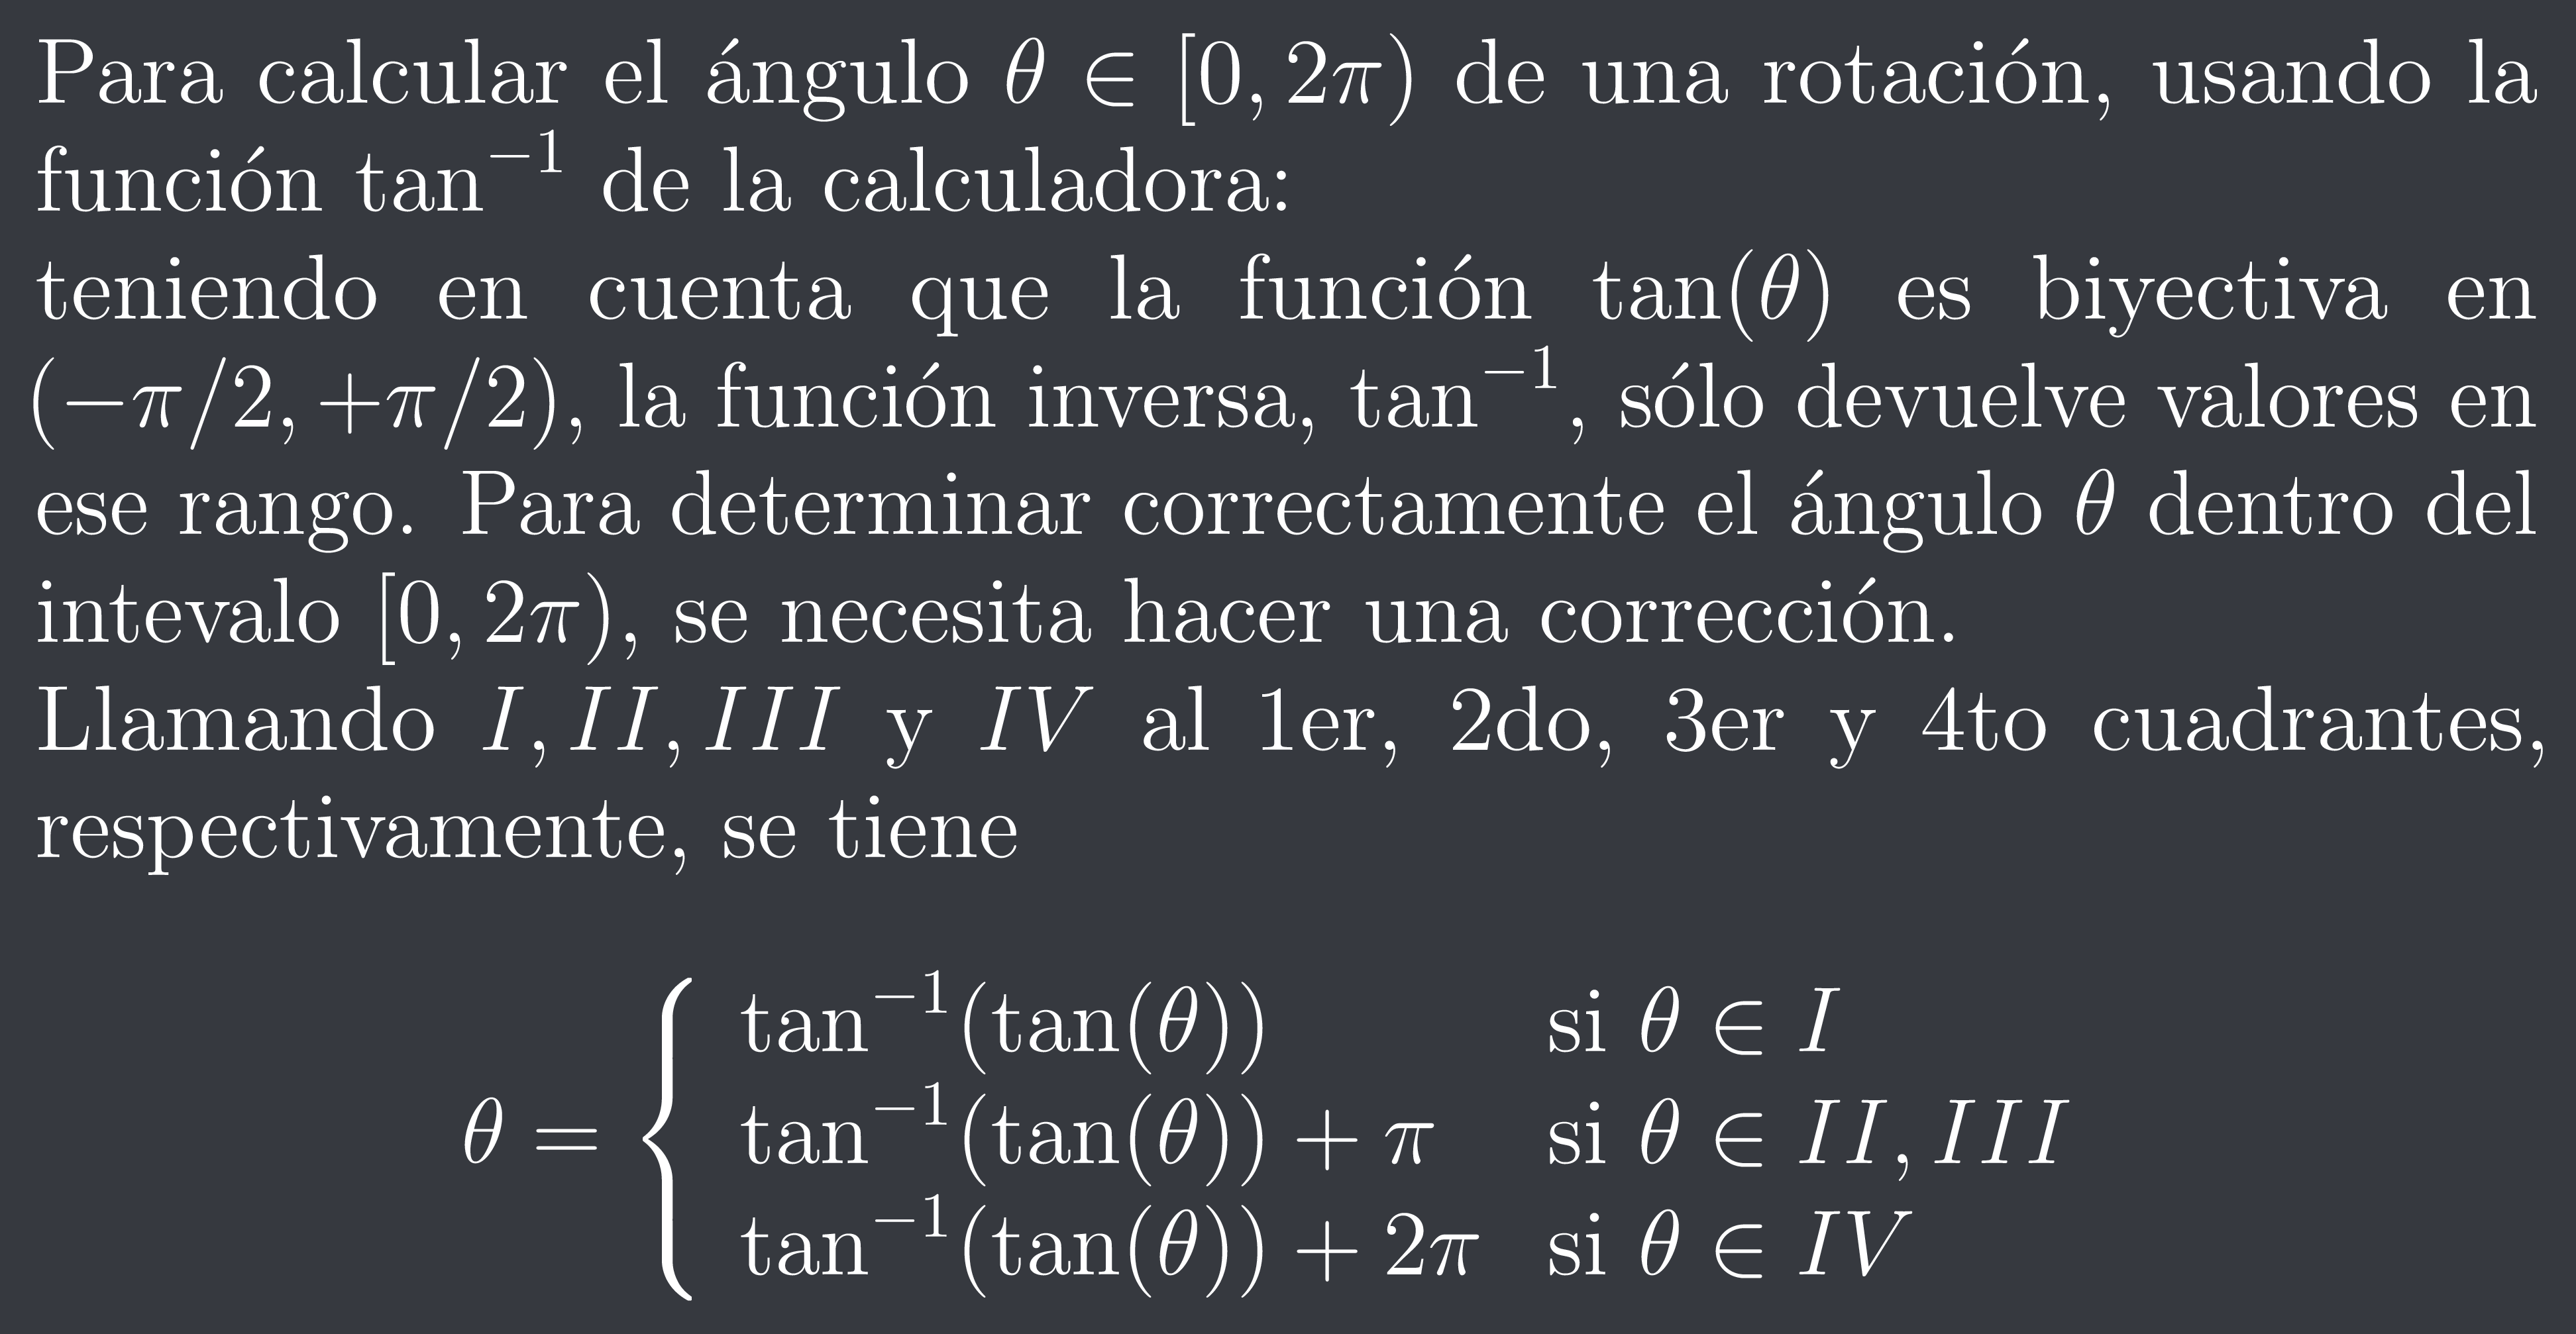

###**Triángulo de Pascal**

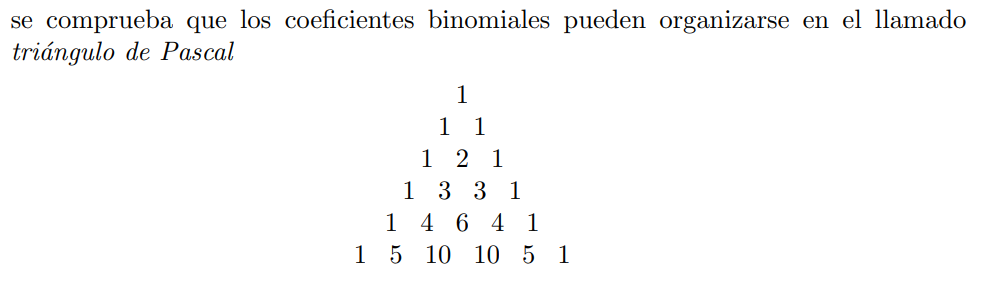

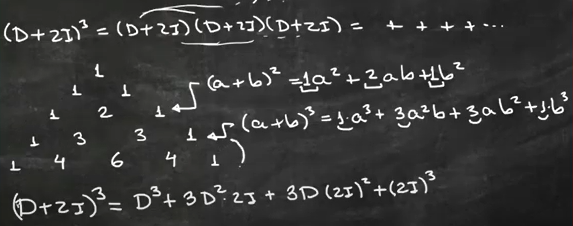

### **Producto Vectorial**

In [3]:
def producto_vectorial(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

###**Traza**

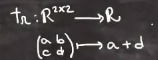

### **Matrices**

**Conseguir inversa de una matriz**

* Se invierten los valores de la diagonal, se niegan los valores de la contra diagonal, se divide todo por el determinante.

In [4]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.trace()                               -> Traza de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})              -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  unos = ones(2,1)                        -> Matriz de 1s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''


#Escritura de matriz, ejemplos:

U = Rational('1/3') * Matrix([[ 2, 2, 1],
                              [-2, 1, 2],
                              [ 1,-2, 2]])

#___________________________________________

t = Symbol('t')
A = Matrix([[ cos(t), -sin(t)],
            [ sin(t), cos(t)]])
A.subs(t, pi/3)


def matriz_con_elementos_potenciados(A, pot):
  m, n = A.shape
  M = Matrix()
  for i in range(m):
    M_a_agregar = Matrix([A[i,0]**pot]) 
    M = M.vstack(M, M_a_agregar)
  return M

def rango(A):
  return len(A.columnspace())


### **Polinomios**

In [5]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  solve(p) -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

#Escritura de polimomio, ejemplos:

x, a0, a1, a2 = symbols('x, a0, a1, a2')
p = a0 + a1*x + a2*x**2

### **Combinación Lineal**

In [6]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [7]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Ínfimo y Supremo**

In [8]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

###**Transformaciones Lineales**

In [9]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

In [10]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 and len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

In [11]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imagen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S

#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U    


### **Coordenadas**

In [12]:
def coordenadas_v_en_B(v: Matrix, B):
  M_B = Matrix.hstack(*B) 
  
  #v = M_B * [v]^B
  vB, pivotes = M_B.gauss_jordan_solve(v)
  
  return vB

def imagen_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, Bprima: List[Matrix]):
  
  #Obtengo Col(At) = gen{[T(v)]^B' ... }
  imagenBprima = At_B_Bprima.columnspace()

  #Quiero Im(T) = gen{T(v) ... }
  #Es decir, necesito escribir los [T(v)]^B' como T(v)
  #T(v) = M_Bprima * [T(v)]^B'
  imagen = Matrix.hstack(*Bprima) * Matrix.hstack(*imagenBprima)
  
  base_imagen = obtener_vectores_li(imagen)
  
  return base_imagen

def nucleo_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoB = At_B_Bprima.nullspace()

  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B
  nucleo = Matrix.hstack(*B) * Matrix.hstack(*nucleoB)
  
  base_nucleo = obtener_vectores_li(nucleo)
  
  return base_nucleo

def nucleo_de_T_con_At_B_Bprima_pol(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoT = T1oT2inv_Eprima_E.nullspace()
  
  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B

  nucleo = Ep * Matrix.hstack(*nucleoT)
  
  return nucleo 

### Graficar

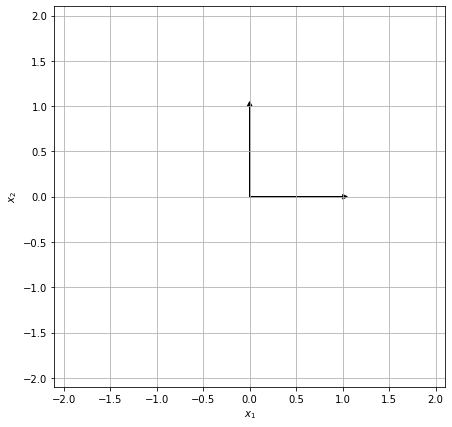

In [13]:
def plot_vector2d(*vectors,xlim=(0,1),ylim=(0,1)):
  fig, ax = plt.subplots(1,1,figsize=(7,7))

  for v in vectors:
    x, y = float(v[0]), float(v[1])
    ax.arrow(0,0,x,y,head_width=0.05, head_length=0.05, fc='k', ec='k')
  
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)
  ax.grid(True)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.show()
  return fig, ax

def plot_recta_simetria(theta,ax):
  x1, x2 = ax.get_xlim()

  if theta not in [pi/2,-pi/2]:
    y1 = float(tan(theta/2*x1))
    y2 = float(tan(theta/2*x2))
  else:
    y1, y2 = ax.get_ylim()
  
  ax.arrow(x1,y1,x2-x1,y2-y1,fc='b',ec='b')
  return ax

def graficar_dos_funciones(f1,f2):
  p1 = plot(f1,xlim=(-1,1),ylim=(-2,2),show=False,line_color='blue')
  p2 = plot(f2,xlim=(-1,1),ylim=(-2,2),show=False,line_color='red')
  p1.append(p2[0])
  p1.show()

v1, v2 = Matrix([1,0]), Matrix([0,1])
fig, ax = plot_vector2d(v1,v2,xlim=(-2.1,2.1),ylim=(-2.1,2.1))

### **Proyecciones y Simetrías**

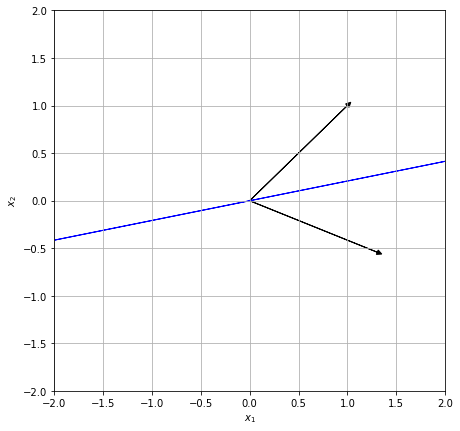

In [14]:
def simetria(v,theta):
  S = Matrix([[cos(theta), sin(theta)],
              [sin(theta), -cos(theta)]])
  w = S * v
  return w

v = Matrix([1,1])
theta = pi/8

v_s = simetria(v,theta)
fig, ax = plot_vector2d(v,v_s,xlim=(-2,2),ylim=(-2,2))
ax = plot_recta_simetria(theta,ax)

#__________________________

def tipo_tl(T: Matrix):
  T2 = T*T
  n,m = T2.shape
  if T2 == T:
    return 'Es una proyección'
  elif T2 == eye(n,n):
    return 'Es una simetría'
  return 'No es proyección ni simetría'
  


### **Rotaciones**

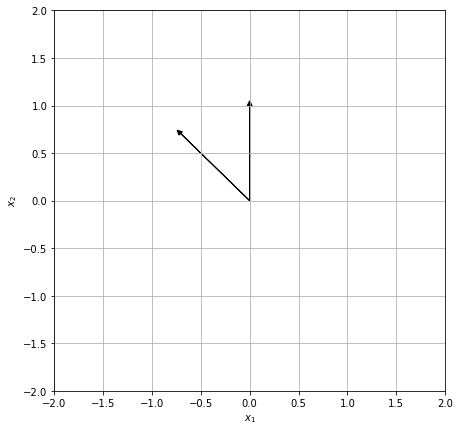

In [15]:
def rotacion(v,theta):
  R = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
  w = R * v
  return w

#Ejemplo
v = Matrix([0,1])
theta = pi/4

v_r = rotacion(v,theta)
fig, ax = plot_vector2d(v,v_r,xlim=(-2,2),ylim=(-2,2))

### **Ecuaciones Diferenciales**

In [16]:
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

###**Producto Interno**

In [17]:
def producto_interno_canonico(x, y, G: Matrix = None):
    return (y.T * x)[0]

def producto_interno_por_definicion(x: Matrix, y: Matrix, G: Matrix):
    return (y.T * G * x)[0]
    
def producto_interno_polinomios_integral(p, q, G:Matrix = None, limite_inferior=-1, limite_superior=1, a=1):
    return integrate(p * q * a, (x, limite_inferior, limite_superior))

def norma(x, producto_interno, G: Matrix=None):
    return sqrt(producto_interno(x, x, G))

#A.norm() -> la norma con el producto interno canónico, es decir, producto escalar

###**Matriz de Gram**

In [18]:
def matriz_gram(producto_interno, B):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q)
    return G 

def matriz_gram_con_G(producto_interno, B, GB):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q, GB)
    return G 

def area_de_un_paralelogramo(G: Matrix):
    return sqrt(G.det())

def area_de_un_triangulo(G: Matrix):
    return area_de_un_paralelogramo(G)/2

###**Proyección Ortogonal**

In [19]:
def y_tilda(y, B: List, producto_interno, G: Matrix = None):
  return Matrix([producto_interno(y, B[i], G) for i in range(len(B))])

def proyeccion_ortogonal_de_v_a_S_un_generador(v, gen, producto_interno, G: Matrix = None):
  return producto_interno(v, gen, G) * gen / norma(gen, producto_interno, G)**2

def proyeccion_ortogonal_de_v_a_S_varios_generadores(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  y_tilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * y_tilda
  p_hat = (Matrix.hstack(*B) * p_coord)
  return p_hat
  
def proyeccion_ortogonal_de_v_a_S_varios_generadores_pol(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  ytilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * ytilda
  p_hat = (Matrix(B).T * p_coord)
  return p_hat

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v


### **Distancia**

In [20]:
def distancia_entre_funciones(f1, f2, producto_interno, G: Matrix = None):
  f = f1 - f2
  d = norma(f, producto_interno)
  return d

###**Ángulo** 

In [21]:
def angulo(x: Matrix, y: Matrix, producto_interno, G: Matrix=None):
    return acos(producto_interno(x, y, G) / (norma(x, producto_interno, G) * norma(y, producto_interno, G)))

### **Subespacios**

Recuerdo:
*   $rango(A)$ = $dim(col(A))$ = $dim(col(A^T))$.
*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A)) \quad$ donde $\quad n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T)) \quad$ donde $\quad m$ = cantidad de filas de $A$ 

_________________

Vale que $nul(A) = col(A^T)^\perp$. Entonces: $$\mathbb R^n = nul(A) \oplus col(A^T).$$

También vale que $nul(A^T) = col(A)^\perp$. Entonces: $$\mathbb R^m = nul(A^T) \oplus col(A).$$


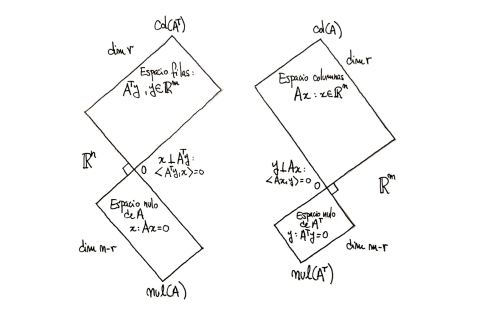

Recuerdo:

$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 

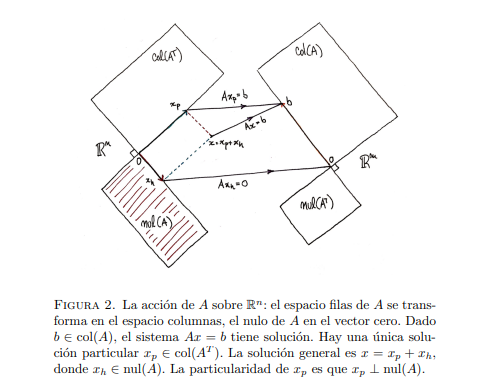

In [22]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     

def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)


### **Mínimos cuadrados**

In [23]:
#A.pinv() -> pseudoinversa 

def solucion_por_minimos_cuadrados(A, b):
  ATA = (A.T)*A
  ATb = (A.T)*b
  sol, sp, generadores = gauss_jordan_con_generadores(ATA, ATb)
  return sp, generadores

def error_cuadratico(b, A, x):
  return (b - A*x).norm()**2

def solucion_norma_minima(A, sp):
  filA = A.T.columnspace()
  MfilA = Matrix.hstack(*filA)
  sol, x_coord, gen = gauss_jordan_con_generadores(A*MfilA, A*sp)
  x_hat = Matrix.hstack(*filA)*x_coord #la solucion de Ax = b de norma mínima
  norma = x_hat.norm() #la norma
  return x_hat, norma

def solucion_por_minimos_cuadrados_rango_max(A, b):
  A_MP = A.pinv() #matriz pseudoinversa de Moore-Penrose
  x_hat = A_MP * b #solución por mínimos cuadrados de Ax=b
  return x_hat

### **Base Ortogonal**

In [24]:
def normalizar_base(v1,v2,producto_interno, G: Matrix = None): #pi personalizado

  v1_hat = v1 / norma(v1,producto_interno, G)
  
  aux = v2 - producto_interno(v2,v1, G) / norma(v1,producto_interno, G)**2 * v1
  v2_hat = aux / norma(aux, producto_interno, G)

  return v1_hat, v2_hat

#GramSchmidt([v1, v2, v3, v4], orthonormal=True)

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v

def QR(A):
  B = A.columnspace()
  Q = GramSchmidt(B, orthonormal='True') #esta es Q
  MQ = Matrix.hstack(*Q)
  MR = MQ.gauss_jordan_solve(A)[0]
  return MQ, MR

### **Polinomio Característico**

In [25]:
def chi(matriz): #Polinomio Caracteristico
  n, m = matriz.shape
  assert n == m, "La matriz tiene que ser cuadrada"
  I = eye(n)
  x = Symbol('x')
  chi_matriz = (matriz - x*I).det()
  return chi_matriz

### **Autovalores y Autovectores**

In [26]:
#matriz.eigenvals() #autovalores y multiplicidades algebraicas
#matriz.eigenvects() #autovalores, multiplicidades algebraicas, autoespacios

def base_autovects(A): #Base autovectores: P
  autovects =  A.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  return P

def autovals_and_autospaces(A):
  n, m = A.shape
  assert n == m, "A tiene que ser cuadrada"

  identity_mat = eye(n) # Matriz identidad en n x n

  l = symbols('\lambda')
  polyA = (A - l * identity_mat).det()

  avas = roots(polyA,l)
  avas = list(avas.keys())

  aves = {ava: (A-ava*identity_mat).nullspace() for ava in avas}

  return avas, aves

###**Diagonalización**


In [27]:
#P, Lambda = matriz.diagonalize() #P y Diagonal

### **Proyectores**

In [28]:
def DS(matriz): #Autovalores y proyectores
  autovects =  matriz.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  IP = P.inv()
  k = 0
  mu = list()
  mu.append(0)
  for i in range(m): 
    k = k + autovects[i][1]
    mu.append(k)
  Y = list()
  for k in mu[0:m]:
    Y.append(IP[mu[k]:mu[k+1], :])
  G = list()
  for j in range(len(X)):
    G.append(simplify(autovects[j][0]))
    G.append(simplify(X[j]*Y[j]))
  return(G)

### **Limite**

In [29]:
def limite(A):
  m = len(A.nullspace()) + len(A.columnspace())
  n = Symbol('n')
  A_n = A**n
  A_infty = zeros(m, m)
  for i in range(m):
      for j in range(m):
          A_infty[i,j] = simplify(limit_seq(A_n[i,j]))
  return(A_infty) 

#Esta función calcula el limite de la sucesión A^n 
#(casi seguro que para matrices diagonalizables)

###**Matrices no diagonalizables**

In [30]:
#P, B = matriz.jordan_form()

###**Matrices Ortogonales**

In [31]:
def caracterizacion_geometrica(U: Matrix):
  n, m = U.shape
  determinante = U.det()
  if n ==2:
    if determinante == 1:
      return 'Es una rotacion'
    elif determinante == -1:
      return 'Es una simetria'
  else: #R3x3
    #busco autovalor 1:
    uno_es_autovalor = false
    mu_uno = 0
    mu_menos_uno = 0
    for i in range(len(U.eigenvects())):
      if U.eigenvects()[i][0] == 1: #1 es autovalor
        uno_es_autovalor = true
        mu_uno = U.eigenvects()[i][1]
      if U.eigenvects()[i][0] == -1: #-1 es autovalor
        mu_menos_uno = U.eigenvects()[i][1]
    if determinante == 1: #uno_es_autovalor = true
      if mu_uno == 3:
        return 'Es la identidad'
      elif mu_uno == 1:
        return 'Es una rotacion'
    elif determinante == -1:
      if uno_es_autovalor:
        return 'Es una simetría'
      else: #el autovalor no es 1, es -1
        if mu_menos_uno == 3:
          return 'Es menos la identidad'
        elif mu_menos_uno == 1:
          return 'Es una rotacion seguida de una simetría'
  return 'No es nada'

def hallar_eje_de_simetria(U: Matrix):
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == 1: #1 es autovalor
      v1 = U.eigenvects()[i][2]
  return v1

def hallar_eje_de_rotacion(U: Matrix):
  determinante = U.det()
  if determinante == 1:
    comparacion = 1
  else:
    comparacion = -1
  v1 = 0
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == comparacion:
      v1 = U.eigenvects()[i][2]
      
  return v1

#checkear
def aaa(U):
  #Busco autoespacio asociado a 1
  for i in range(len(U.eigenvects())):
    if U.eigenvects()[i][0] == 1: #1 es autovalor
      v1 = U.eigenvects()[i][2]
  v1 = v1[0]
  u1 = v1/v1.norm()
  v2 = v1.T.nullspace()[0]
  u2 = v2/v2.norm()
  u3 = producto_vectorial(u1, u2)
  P = Matrix.hstack(u1, u2, u3)
  return (P.inv())*U*P

def angulo_rotacion(U):
  cos = (U.trace()-1)/2
  #Busco autoespacio asociado a 1
  v1 = hallar_eje_de_rotacion(U)[0]
  u1 = v1/v1.norm()
  v2 = v1.T.nullspace()[0]
  u2 = v2/v2.norm()
  u3 = producto_vectorial(u1, u2)
  sen = Matrix.hstack(u1, u2, U*u2).det()
  #angulo = acos(cos)
  if sen > 0 and cos > 0: #primero
    return float(deg(atan(float(sen/cos))))
  if sen > 0 and cos < 0: #segundo
    return float(deg(atan(float(sen/cos))))+180
  if sen < 0 and cos < 0: #tercero
    return float(deg(atan(float(sen/cos))))+180
  if sen < 0 and cos > 0: #cuarto
    return float(deg(atan(float(sen/cos))))+360

### **Teorema Espectral**

In [32]:
def burbuja(lista):
    for i in range(1,len(lista)):
        for j in range(0,len(lista)-i):
            if(lista[j+1][0] > lista[j][0]):
                aux=lista[j];
                lista[j]=lista[j+1];
                lista[j+1]=aux;
    return lista

def diagonalizacion_ortogonal(A):
  A.eigenvects()
  informacion = burbuja(A.eigenvects()) #reordeno de mayor a menor
  autovalores = []
  for i in range(len(informacion)):
    for j in range(informacion[i][1]):
      autovalores.append(informacion[i][0])
  autoespacios = []
  for i in range(len(informacion)):
    for j in range(len(informacion[i][2])):
      autoespacios.append(informacion[i][2][j])
  U = Matrix.hstack(*GramSchmidt(autoespacios, orthonormal=True))
  Lambda = diag(*autovalores)
  return U, Lambda

def descomposicion_espectral(A):

  # Verifico que la matriz sea simétrica
  assert A.T == A, "La matriz tiene que ser simétrica"
  
  n, _ = A.shape # Cantidad de filas/columnas
  Id = eye(n) # Matriz identidad en n x n

  # Obtengo los autovalores y autovectores
  x = symbols('x')
  polyA = (A-x*Id).det()
  avas = sorted(roots(polyA).keys())
  avas2aves = {ava: (A-ava*Id).nullspace() for ava in avas} # {ava1: [ave1,...], ...}
  
  # Obtengo un diccionario con los autovalores y su correspondiente matriz espectral
  P = dict()
  for ava, aves in avas2aves.items():
    norm_aves = GramSchmidt(aves,orthonormal=True)
    X = Matrix.hstack(*norm_aves)
    P_ava = X * X.T
    P[ava] = P_ava
    display("Matriz espectral asociada al autovalor {}".format(ava),P_ava)
    print()

  return P

###**Descomposición en Valores Singulares**

In [33]:
#A.singular_values()
#matrix.normalized() #matrix norm = 1

## **Específico**

###**Formas Cuadráticas**

Una forma cuadrática en $\mathbb R^n$ es una función $Q:\mathbb{R}^n\to\mathbb{R}$ que se pueden representar de la siguiente manera 
$$Q(x) = x^TAx = \sum_{i=1}^n a_{ii}x_i^2 + \sum_{1\leq i < j \leq n} 2a_{ij}x_ix_j,$$
donde $A\in\mathbb{R}^{n\times n}$ es una matriz simétrica.

$→$ La matriz simétrica $A$ es única.

**Conjuntos de nivel**

Dado $c\in \mathbb R$ el conjunto de todas las soluciones de la ecuación $Q(x) =c$ se denomina el conjunto de nivel de $c$ de $Q$ $$\mathcal N_c(Q) = \{x\in\mathbb R^n:Q(x) = c\}.$$

**Cambios de variables**

Sea $M \in\mathbb R^{n\times n}$ una matriz inversible. Si se realiza el cambio de variables $x = My$, entonces $$\hat Q(y) = Q(My) = y^T M^T AMy$$

**Teorema de los ejes principales.** Existe un cambio de variables ortogonal $x = Py$ que transforma la forma cuadrática $Q(x) = x^TAx$ en una forma cuadrática de la forma $\hat Q(y) = y^T\Lambda y$ sin términos cruzados.

Si $P = [u_1 \dots u_n]$ e $y\in\mathbb R^n$, entonces $$Q(Py) = Q\left(\sum_{j=1}^n y_ju_j\right) = \sum_{j=1}^n y_jy_j^2.$$

Las columnas de $P$ se denominan ejes principales de la forma cuadrática $Q$.

El efecto de la diagonalización ortogonal de la matriz $A$ es una rotación del sistema de coordenadas canónico para que el gráfico del conjunto de nivel $x^TAx = c$ se vuelva evidente (sin términos cruzados).

**Formas canónicas**

Existe una matriz inversible $M\in\mathbb R^{n\times n}$ tal que el cambio de varibales $x = My$ permite expresar a $Q$ en la forma $$\hat Q(y) = y^T\begin{bmatrix}I_p&0&0\\0&-I_q&0\\0&0&0_r\end{bmatrix}y$$ donde $p$, $q$ y $r$ son, respectivamente, las cantidades de autovalores positivos, negativos y nulos de $A$ (contados con sus multiplicidades).

Esta representación se denomina la forma canónica de $Q$.

####**Catálogo de superficies de nivel**

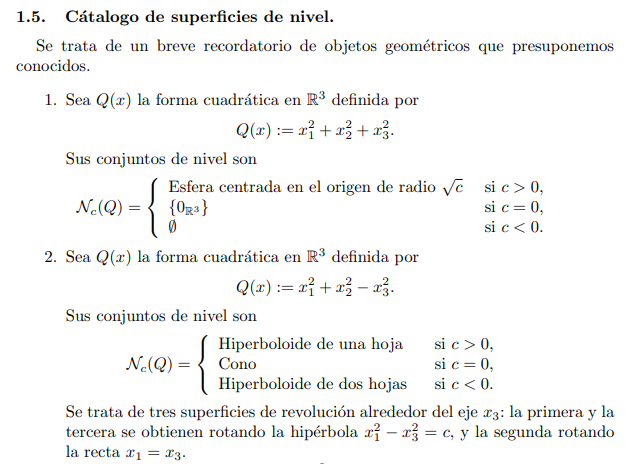

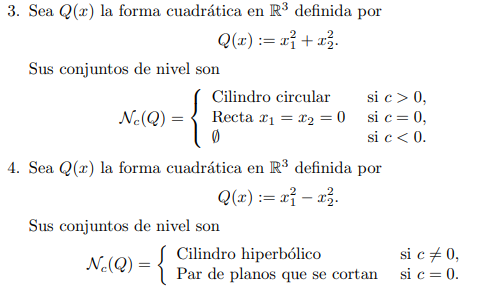

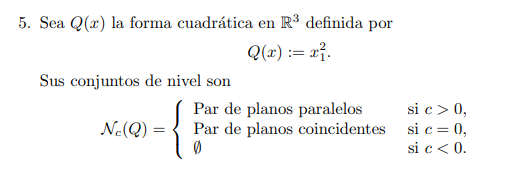

#### **Clasificación de Q**

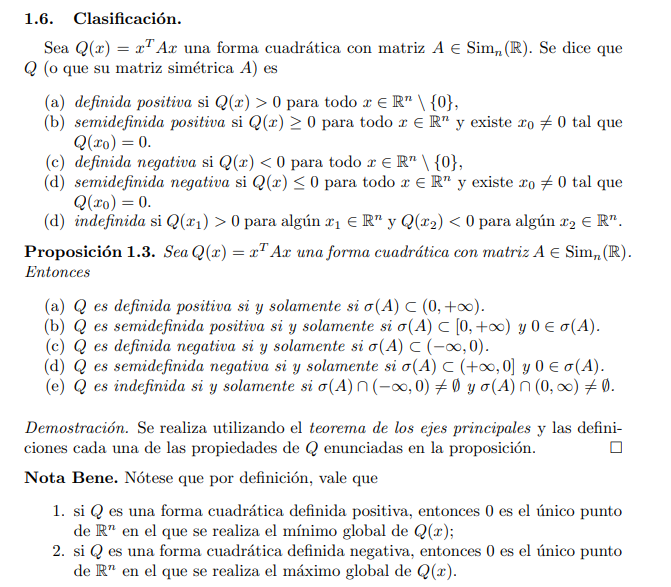

$A = \begin{bmatrix}a&b\\c&d\end{bmatrix}$

$\rightarrow$ **Tip.** Si $det(A) > 0$ y $a > 0 ⇒ A$ es definida positiva. 

#### **Imagen de los autoespacios**

Sea $Q(x) = x^TAx$ una forma cuadrática en $\mathbb R^n$. Vale que $$Q(x) = \lambda \|x\|^2 \quad \forall x \in \mathbb S_\lambda.$$

Entonces $$Q(x) = \sum_{\lambda \in \sigma(A)}\lambda \|x_\lambda\|^2.$$

Es decir, la imagen de $x$ por $Q$ se obtiene superponiendo los cuadrados de las longitudes de las componentes de $x$ sobre cada uno de los autoespacios de la matriz de $Q$, cada uno multiplicado por su respectivo autovalor.

#### **Distancias al origen**

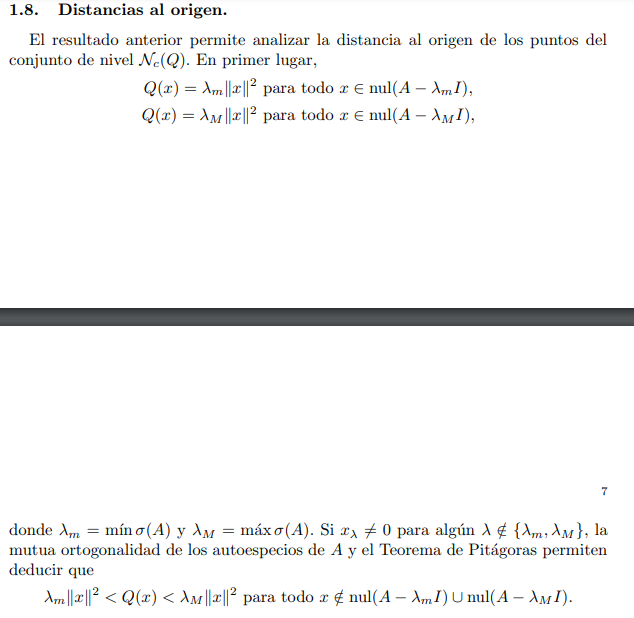

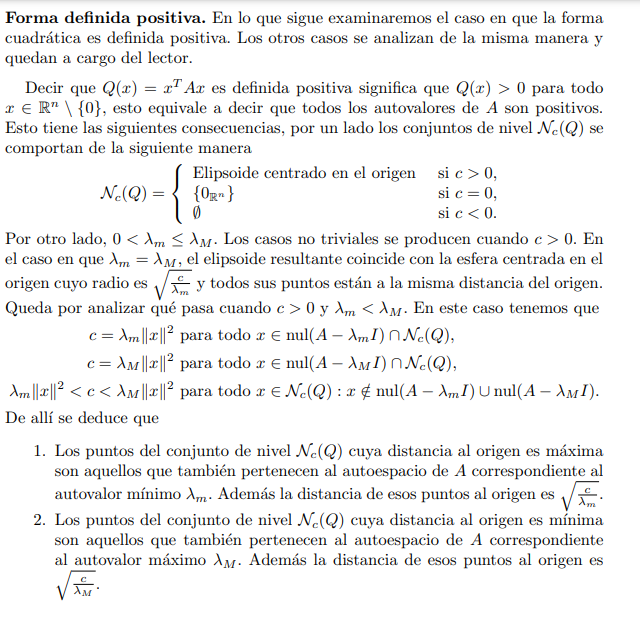

## Notas

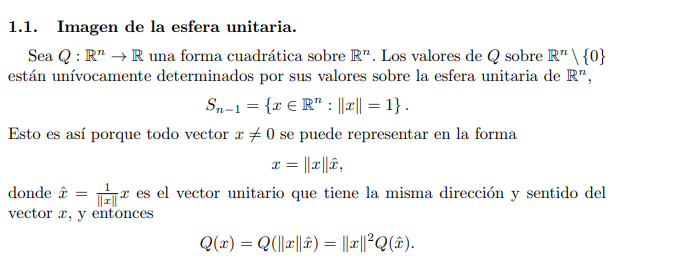

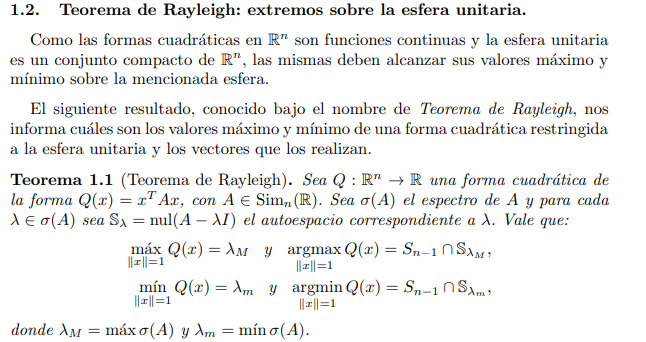

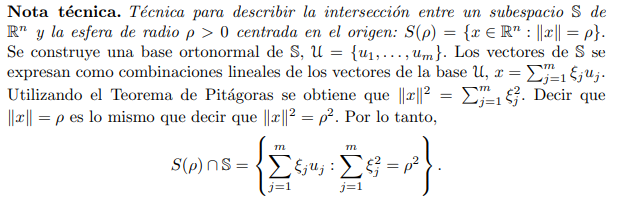

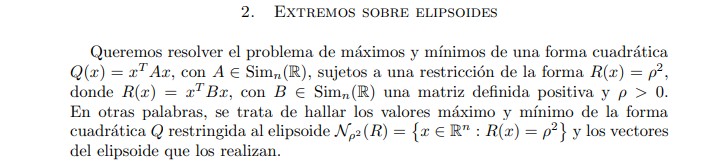

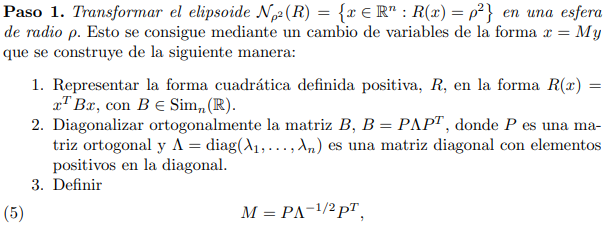

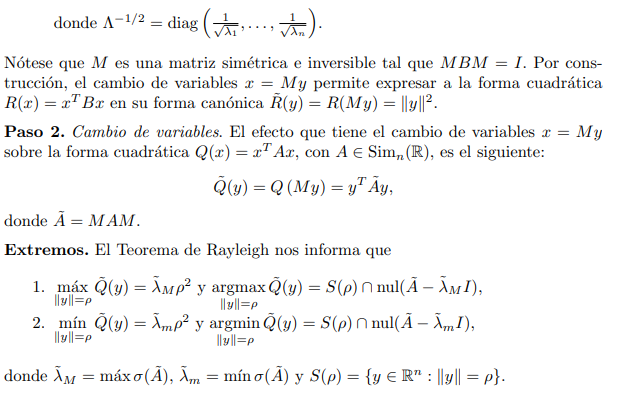

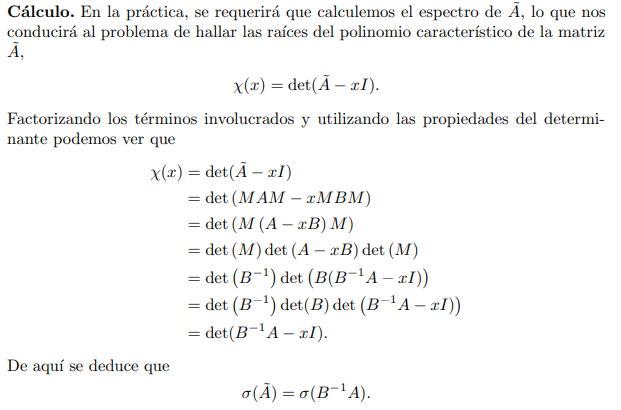

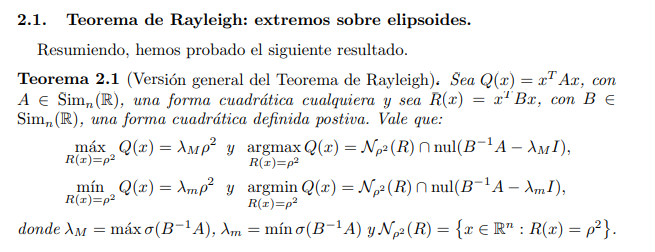

## **Ejercicios**

### **Generales**

#### Sean las formas cuadráticas en $\mathbb R^2$ definidas por

$Q(x): \mathbb R^2 → \mathbb R / Q(x) = \frac49x_1^2 - \frac{80}9x_1x_2-\frac{125}9x_2^2$.

$R(x): \mathbb R^2 → \mathbb R / R(x) = 4x_1^2 + 25x_2^2$.

Hallar, si existen, $\max_{x \in \mathcal N_9(R)} Q(x)$ y $\min_{x \in \mathcal N_9(R)} Q(x)$, y determinar todos los $x \in \mathcal N_9(R)$ que maximizan $Q(x)$ y aquellos que lo minimizan.


In [ ]:
#Escribo A y B
A = Matrix([[Rational('4/9'), Rational('-40/9')],
            [Rational('-40/9'), Rational('-125/9')]])
B = Matrix([[4, 0],
            [0, 25]])
#Veo que forma cuadrática es B
B.eigenvals() #R(x) es definida positiva => se puede usar el T. de Rayleigh Generalizado

#Busco B^(-1).A
BinvA = B.inv()*A
BinvA.eigenvects() #Mayor: 1/3, [-5 1]; Menor: -7/9, [5 4]

#El maximo vale 1/3 . 9 = 3
#El maximo se alcanza en x = a.[-5 1] tal q R(x) = 9 (por enunciado)
#R(x) = R(a.[-5 1]) = a^2.R([-5 1]) = a^2.(4.(-5)^2 + 25.(1)^2) = a^2.(100 + 25) = 125.a^2
#125.a^2 = 9 (por enunciado)
#|a| = 3.raiz(5)/25
#=> max = 3, argmax = +- (3.raiz(5)/25) [-5 1]

#El mínimo vale -7/9 . 9 = -7
#El mínimo se alcanza en x = b.[5 4] tal q R(x) = 9 (por enunciado)
#R(x) = R(b.[5 4]) = b^2.R([5 4]) = b^2.(4.(5)^2 + 25.(4)^2) = b^2.(100 + 400) = 500.b^2
#500.b^2 = 9 (por enunciado)
#|b| = 3.raiz(5)/50
#=> min = -7, argmin = +- (3.raiz(5)/50) [5 4]

#### Sea $Q: \mathbb R^2 \rightarrow R$ la forma cuadrática dada por $Q(x) = x^TAx$, $A = \begin{bmatrix}\frac{13}2&\frac52\\\frac52&\frac{13}2\end{bmatrix}$.

$\quad a.$ Determinar un cambio de variables $x = My$ tal que $\hat Q(y)=Q(My)=\|y\|^2$.

$\quad b.$ Hallar, si existen, el máximo y el mínimo de $Q(x)$ sujeto a la restricción $R(x)=1$, donde $R(x) = x^TBx$ con $B = \begin{bmatrix}1&2\\2&3\end{bmatrix}$, y determinar los vectores que los realizan.

In [67]:
#a.
A = Matrix([[Rational('13/2'), Rational('5/2')],
            [Rational('5/2'), Rational('13/2')]])
#Veo que forma cuadrática es A
A.eigenvals() #Q(x) es definida positiva

#Diagonalizo ortogonalmente a A
v1, v2 = A.eigenvects()[1][2][0].normalized(), A.eigenvects()[0][2][0].normalized()
P = Matrix.hstack(v1,v2)
Lambda_raiz = diag(sqrt(9), sqrt(4))
M = P*(Lambda_raiz).inv()

#Por forma canónica: 
#Q(My) = y^T * [[1, 0],
#               [0, 1]] * y 

#b.
B = Matrix([[1, 2],
            [2, 3]])
#Veo que forma cuadrática es B
B.eigenvals() #R(x) es indefinida.

#La restricción en terminos de y es:
#R_(y) = R(My) = (My)^T.B.My = y^T.(M^T.B.M).y = y^T B_ y
B_hat = M.T*B*M

#Diagonalizo ortogonalmente a B porque tiene terminos cruzados
v1, v2 = B_hat.eigenvects()[1][2][0].normalized(), B_hat.eigenvects()[0][2][0].normalized()
P = Matrix.hstack(v1,v2)
Lambda = diag(Rational('1/2'), Rational('-1/18'))
#la restriccion resulta (1/2).z1^2 - 1/18.z2^2 = 1
#                       (z1/raiz(2))^2 - (z2/raiz(18))^2 = 1-> hiperbola

#No hay maximo

#Minimo = (raiz(2))^2 = 2
#Se realiza en +- raiz(2).v1
#En terminos de x, con x = My => +- M.raiz(2).v1

⎛⎡3⋅√10  -√10 ⎤              ⎞
⎜⎢─────  ─────⎥              ⎟
⎜⎢  10     10 ⎥  ⎡1/2    0  ⎤⎟
⎜⎢            ⎥, ⎢          ⎥⎟
⎜⎢ √10   3⋅√10⎥  ⎣ 0   -1/18⎦⎟
⎜⎢ ───   ─────⎥              ⎟
⎝⎣  10     10 ⎦              ⎠

### **Stop**